1. Pandas Fundamentals
----------------------------------------
Initial DataFrame:
        date  vehicle_count  avg_speed  accidents weather
0 2023-01-01           1626       50.2          5  Cloudy
1 2023-01-02           1959       43.3          3   Sunny
2 2023-01-03           1360       40.4          3   Sunny

Monthly Statistics:
          vehicle_count       accidents
                   mean   max       sum
month                                  
April       1173.800000  1995        93
August      1224.225806  1962        94
December    1224.806452  1896       107
February    1218.392857  1999        72
January     1339.419355  1982       101
July        1527.290323  1995       103
June        1401.433333  1996        90
March       1343.903226  1985        98
May         1230.612903  1985        79
November    1255.500000  1915        84
October     1250.064516  1996       100
September   1203.433333  1938        81

Weather Impact Table:
day_of_week     Friday     Monday   Satur

/var/folders/zb/2x82pvwn0cj7vr9jln1df3nc0000gn/T/ipykernel_75301/345553340.py:39: FutureWarning: The provided callable <function mean at 0x10b3dfb00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  weather_impact = pd.pivot_table(traffic,


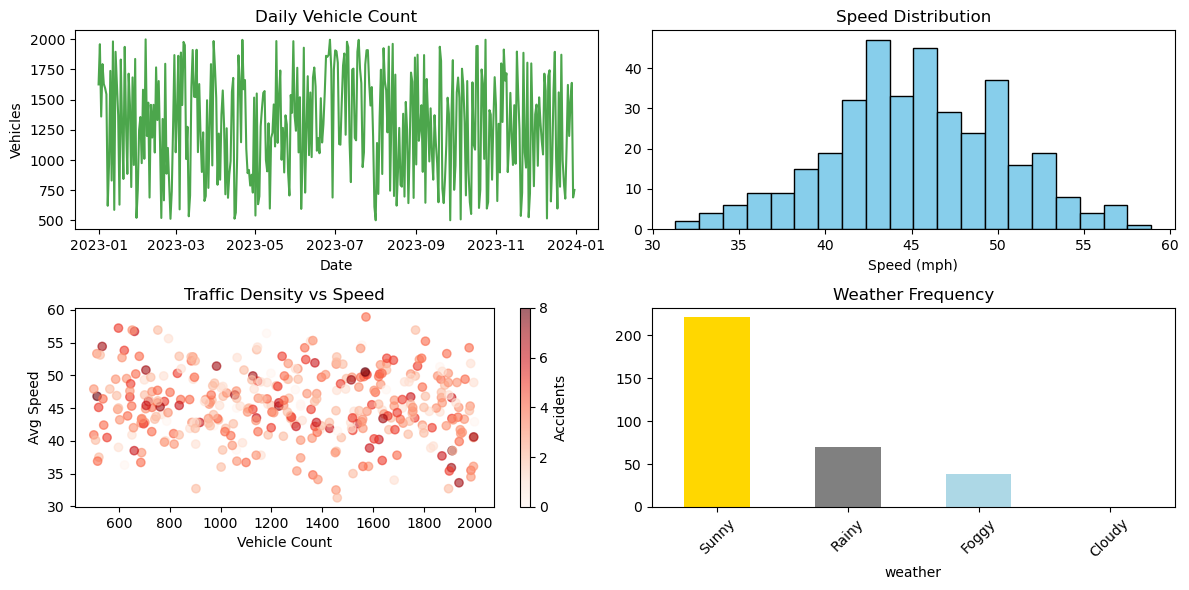


3. Seaborn Visualizations
----------------------------------------


/var/folders/zb/2x82pvwn0cj7vr9jln1df3nc0000gn/T/ipykernel_75301/345553340.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='avg_speed', data=traffic, palette='viridis')
/var/folders/zb/2x82pvwn0cj7vr9jln1df3nc0000gn/T/ipykernel_75301/345553340.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='weather', y='vehicle_count', data=traffic,


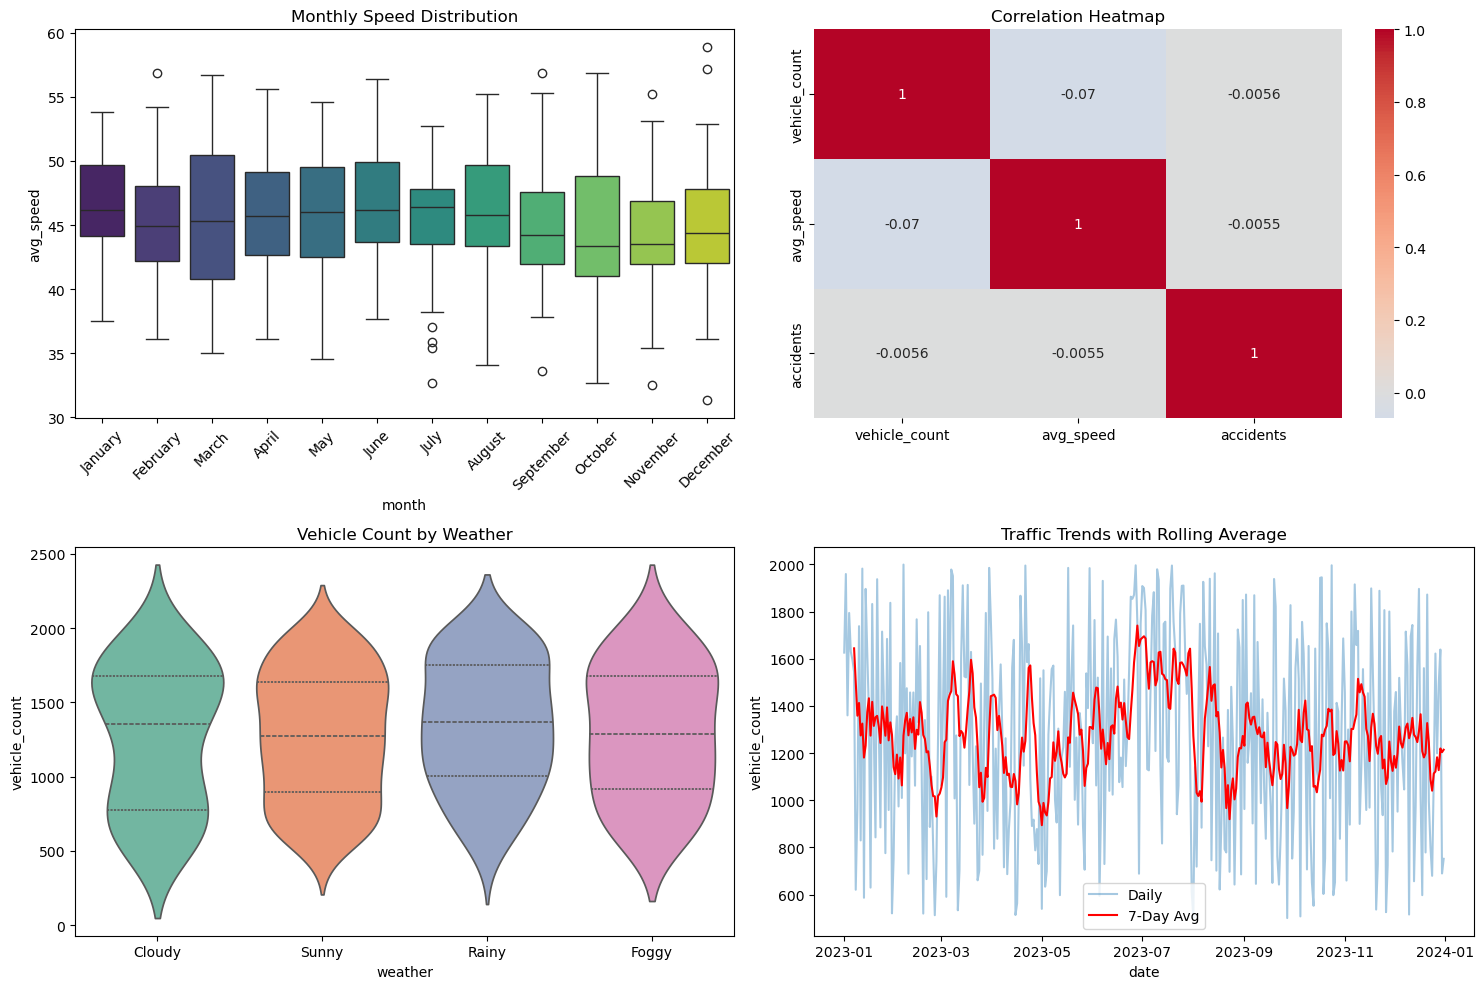


4. Advanced Analysis
----------------------------------------
Found 0 outliers in vehicle count
Weekday Avg Speed: 44.9 mph
Weekend Avg Speed: 46.6 mph

Weather Impact on Speed:
              mean       std
weather                     
Cloudy   45.697222  5.825387
Foggy    44.473684  6.537447
Rainy    45.152857  5.272370
Sunny    45.524434  4.634107

Data exported to processed_traffic_data.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


print("1. Pandas Fundamentals\n" + "-"*40)


np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=365)
data = {
    'date': dates,
    'vehicle_count': np.random.randint(500, 2000, size=365),
    'avg_speed': np.random.normal(45, 5, 365).round(1),
    'accidents': np.random.poisson(3, 365),
    'weather': np.random.choice(['Sunny', 'Rainy', 'Foggy', 'Cloudy'], 365, p=[0.6, 0.2, 0.1, 0.1])
}


traffic = pd.DataFrame(data)
print("Initial DataFrame:")
print(traffic.head(3))


traffic['month'] = traffic['date'].dt.month_name()
traffic['day_of_week'] = traffic['date'].dt.day_name()


monthly_stats = traffic.groupby('month').agg({
    'vehicle_count': ['mean', 'max'],
    'accidents': 'sum'
})
print("\nMonthly Statistics:")
print(monthly_stats)


weather_impact = pd.pivot_table(traffic, 
                               values='avg_speed', 
                               index='weather', 
                               columns='day_of_week', 
                               aggfunc=np.mean)
print("\nWeather Impact Table:")
print(weather_impact)


print("\n2. Matplotlib Visualizations\n" + "-"*40)

plt.figure(figsize=(12, 6))

# Line plot
plt.subplot(2, 2, 1)
plt.plot(traffic['date'], traffic['vehicle_count'], 'g-', alpha=0.7)
plt.title('Daily Vehicle Count')
plt.xlabel('Date')
plt.ylabel('Vehicles')

# Histogram
plt.subplot(2, 2, 2)
plt.hist(traffic['avg_speed'], bins=20, color='skyblue', edgecolor='black')
plt.title('Speed Distribution')
plt.xlabel('Speed (mph)')

# Scatter plot
plt.subplot(2, 2, 3)
plt.scatter(traffic['vehicle_count'], traffic['avg_speed'], 
            c=traffic['accidents'], cmap='Reds', alpha=0.6)
plt.colorbar(label='Accidents')
plt.title('Traffic Density vs Speed')
plt.xlabel('Vehicle Count')
plt.ylabel('Avg Speed')

# Bar plot
plt.subplot(2, 2, 4)
traffic['weather'].value_counts().plot(kind='bar', color=['gold', 'grey', 'lightblue', 'white'])
plt.title('Weather Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\n3. Seaborn Visualizations\n" + "-"*40)

plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.boxplot(x='month', y='avg_speed', data=traffic, palette='viridis')
plt.title('Monthly Speed Distribution')
plt.xticks(rotation=45)

# Heatmap
plt.subplot(2, 2, 2)
corr_matrix = traffic[['vehicle_count', 'avg_speed', 'accidents']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

# Violin plot
plt.subplot(2, 2, 3)
sns.violinplot(x='weather', y='vehicle_count', data=traffic, 
               palette='Set2', inner='quartile')
plt.title('Vehicle Count by Weather')

# Time series decomposition
plt.subplot(2, 2, 4)
traffic['rolling_avg'] = traffic['vehicle_count'].rolling(7).mean()
sns.lineplot(x='date', y='vehicle_count', data=traffic, 
             label='Daily', alpha=0.4)
sns.lineplot(x='date', y='rolling_avg', data=traffic, 
             label='7-Day Avg', color='red')
plt.title('Traffic Trends with Rolling Average')
plt.legend()

plt.tight_layout()
plt.show()


print("\n4. Advanced Analysis\n" + "-"*40)

# Outlier detection
q1 = traffic['vehicle_count'].quantile(0.25)
q3 = traffic['vehicle_count'].quantile(0.75)
iqr = q3 - q1
outliers = traffic[(traffic['vehicle_count'] < (q1 - 1.5*iqr)) | 
                  (traffic['vehicle_count'] > (q3 + 1.5*iqr))]
print(f"Found {len(outliers)} outliers in vehicle count")

# Time-based analysis
weekend_mask = traffic['day_of_week'].isin(['Saturday', 'Sunday'])
weekday_avg = traffic[~weekend_mask]['avg_speed'].mean()
weekend_avg = traffic[weekend_mask]['avg_speed'].mean()
print(f"Weekday Avg Speed: {weekday_avg:.1f} mph")
print(f"Weekend Avg Speed: {weekend_avg:.1f} mph")

# Categorical analysis
weather_speed = traffic.groupby('weather')['avg_speed'].agg(['mean', 'std'])
print("\nWeather Impact on Speed:")
print(weather_speed)

# ==============================================
# 5. DATA EXPORT
# ==============================================
traffic.to_csv('processed_traffic_data.csv', index=False)
print("\nData exported to processed_traffic_data.csv")